# GenoML Demo for IPDGC London Workshop 2019

## Details
- **Put together by:** Hampton Leonard, Mary Makarious, and Mike Nalls
- **Project:** GenoML Demo for IPDGC London 2019 
- **PIs:** Mike Nalls, PhD and Andrew Singleton, PhD from the Laboratory of Neurogenetics NIH/NIA/NINDS
- **Collaborators:** Full list of collaborators [here](https://genoml.github.io/)
- **Date Last Updated:** 12.09.2019
	- Last Update: Initializing README and course folder on GitHub


## Description + Objective 

## Table of Contents
### [0. Getting Started](#0)
 1. ???
 2. ???
 
### [1. Data Munging](#1)
 1. ???
 2. ???
 
### [2. Training the Model](#2)
 1. ???
 2. ???
 
### [3. Tuning the Model](#3)
 1. ???
 2. ???
 
### [4. Testing the Model](#4)
 1. ???
 2. ???
 
### [5. Interpreting Results](#5)
 1. ???
 2. ???

<a id="0"></a>
## Part 0: Getting Started 

In [11]:
# Import the necessary packages 
import os
import sys
import argparse
import math
import time
import h5py
import joblib
import subprocess
import numpy as np
import pandas as pd

# Additional packages for VIF calculation
import random
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
from joblib import Parallel, delayed

# Additional packages for training
import xgboost
import sklearn
import seaborn as sns

# Additional packages for tuning
from scipy.stats import randint as sp_randint
from scipy.stats import uniform as sp_randfloat

In [12]:
# Check the platform to load the right PLINK to path
    # This will load a PLINK v1.9 which is necessary for data munging 
    # If running this in Docker/Binder - nothing to worry about :) 
from sys import platform
def get_platform():
    platforms = {
        "linux" : "linux",
        "linux1" : "linux",
        "linux2" : "linux",
        "darwin" : "mac"
    }
    if sys.platform not in platforms:
        return "GenoML is not supported on this platform. Please try Mac or Linux"
    elif platforms[sys.platform] == "mac":
        filename_mac = "plink/mac/"
        directory_mac = os.getcwd() + "/" + filename_mac
        os.environ["PATH"] = os.environ["PATH"] + os.pathsep + directory_mac
    else:
        filename_linux = "plink/linux/"
        directory_linux = os.getcwd() + "/" + filename_linux
        os.environ["PATH"] = os.environ["PATH"] + os.pathsep + directory_linux
    return print("PLINK has successfully been loaded to your path!")

# Run and get the proper PLINK to path
get_platform()

# Set seed for reproducibility!
random.seed(10211993)

PLINK has successfully been loaded to your path!


<a id="1"></a>
## Part 1: Data Munging

### Brief Overview:
In this section we will look at how GenoML munges and cleans the data. 
The data being used in this demo are not real individuals or SNPs

### What we will look at in this section:
1. What the input files look like 
    - Phenotype file
    - PLINK binaries 
2. How to run the GenoML munging scipt 
    - How to glance at the script
    - How to submit a command 
    - How to tweak the inputs 
 

In [13]:
# Let's have a look at what the input files look like 
    # 1 = case
    # 0 = control 
pheno_file = pd.read_csv("example_inputs/training_pheno.csv")
pheno_file.head()

,ID,PHENO
0,sample1,1
1,sample2,1
2,sample3,1
3,sample4,0
4,sample5,0


In [14]:
# What about how the geno files look like?
    # These are standard PLINK binaries 
geno_bim = pd.read_csv("example_inputs/training.bim", delimiter='\t')
geno_fam = pd.read_csv("example_inputs/training.fam")

print("Here is a glimpse of what the bim file (with the SNP info) looks like")
print(geno_bim.head())

print()
print("Here is a glimpse of what the fam file (with the sex amd phenotype info) looks like")
print(geno_fam.head())

print()
print("The .bed file is a binary file - so no need to look at it now :) ")

Here is a glimpse of what the bim file (with the SNP info) looks like
   1  snp410  0  10638604  T  C
0  1  snp403  0  12013215  T  C
1  1  snp164  0  15857302  C  T
2  1  snp363  0  15903085  T  G
3  1  snp439  0  16306012  G  C
4  1  snp370  0  16326935  A  G

Here is a glimpse of what the fam file (with the sex amd phenotype info) looks like
     sample81 sample81 0 0 2 1
0  sample158 sample158 0 0 1 2
1  sample216 sample216 0 0 2 2
2    sample36 sample36 0 0 1 1
3  sample346 sample346 0 0 2 2
4  sample274 sample274 0 0 2 1

The .bed file is a binary file - so no need to look at it now :) 


In [16]:
%run -i ./scripts/munging.py\
--prefix ./example_outputs/test_discrete_geno\
--pheno ./example_inputs/training_pheno.csv\
--geno ./example_inputs/training\
--vif 5\
--iter 1


Here is some basic info on the command you are about to run.
Python version info...
3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
CLI argument info...
The output prefix for this run is ./example_outputs/test_discrete_geno and will be appended to later runs of GenoML.
Working with genotype data? ./example_inputs/training
Working with additional predictors? nope
Where is your phenotype file? ./example_inputs/training_pheno.csv
Any use for an external set of GWAS summary stats? nope
If you plan on using external GWAs summary stats for SNP filtering, we'll only keep SNPs at what P value? 0.001
How strong is your VIF filter? 5
How many iterations of VIF filtering are you doing? 1
The imputation method you picked is using the column median to fill in any remaining NAs.
Give credit where credit is due, for this stage of analysis we use code from the great contributors to python packages: os, sys, argparse, numpy, pandas, joblib, math and time. We also use PLI

<a id="2"></a>
## Part 2: Training the Model


Here is some basic info on the command you are about to run.
Python version info...
3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
CLI argument info...
Are you ranking features, even though it is pretty slow? Right now, GenoML runs general recursive feature ranking. You chose to run this part.
Working with dataset ./example_outputs/test_discrete_geno from previous data munging efforts.
Give credit where credit is due, for this stage of analysis we use code from the great contributors to Python packages: argparse, xgboost, sklearn, pandas, numpy, time, matplotlib and seaborn.
As a note, in all exported probabilities and other graphics, case status is treated as a 0 or 1, with 1 representing a positive case.


Your data looks like this (showing the first few lines of the left-most and right-most columns)...
##############################
            PHENO    snp410_T    snp403_T    snp164_C    snp439_G    snp370_A  \
count  500.000000  500.000000  500.000

/Users/makariousmb/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


Accuracy: 56.6667%
Balanced Accuracy: 48.5171%
Log Loss: 0.6894
Runtime in seconds: 0.1638

##############################
GradientBoostingClassifier
AUC: 47.4528%
Accuracy: 66.0000%
Balanced Accuracy: 52.8940%
Log Loss: 0.7034
Runtime in seconds: 0.3813

##############################
SGDClassifier
AUC: 42.2746%
Accuracy: 50.0000%
Balanced Accuracy: 42.2746%
Log Loss: 17.27
Runtime in seconds: 0.01308

##############################
SVC
AUC: 52.7625%
Accuracy: 75.3333%
Balanced Accuracy: 50.0000%
Log Loss: 0.5817
Runtime in seconds: 0.3636



./scripts/training.py:125: RuntimeWarning: invalid value encountered in long_scalars
  NPV = TN/(TN+FN)


##############################
MLPClassifier
AUC: 49.2944%
Accuracy: 63.3333%
Balanced Accuracy: 52.9419%
Log Loss: 1.207
Runtime in seconds: 0.3454

##############################
KNeighborsClassifier
AUC: 53.0615%
Accuracy: 64.6667%
Balanced Accuracy: 54.7357%
Log Loss: 1.545
Runtime in seconds: 0.1335

##############################
QuadraticDiscriminantAnalysis
AUC: 49.1509%
Accuracy: 46.6667%
Balanced Accuracy: 49.1509%
Log Loss: 18.42
Runtime in seconds: 0.02635



/Users/makariousmb/anaconda3/lib/python3.7/site-packages/sklearn/discriminant_analysis.py:693: UserWarning: Variables are collinear
  warnings.warn("Variables are collinear")


##############################
BaggingClassifier
AUC: 49.4858%
Accuracy: 65.3333%
Balanced Accuracy: 53.3604%
Log Loss: 0.8736
Runtime in seconds: 0.1159

##############################
XGBClassifier
AUC: 46.5200%
Accuracy: 64.0000%
Balanced Accuracy: 49.7489%
Log Loss: 0.6921
Runtime in seconds: 0.7419

##############################

This table below is also logged as ./example_outputs/test_discrete_geno.training_withheldSamples_performanceMetrics.csv and is in your current working directory...
##############################
                       Algorithm  AUC_Percent  Accuracy_Percent  \
0             LogisticRegression    46.926573         54.666667   
0         RandomForestClassifier    54.783545         60.000000   
0             AdaBoostClassifier    46.209041         56.666667   
0     GradientBoostingClassifier    47.452762         66.000000   
0                  SGDClassifier    42.274575         50.000000   
0                            SVC    52.762497         75.333333  

/Users/makariousmb/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)



We are also exporting a ROC curve for you here ./example_outputs/test_discrete_geno.trainedModel_withheldSample_ROC.png this is a graphical representation of AUC in the withheld test data for the best performing algorithm.

Preview of the exported predictions for the withheld test data that has been exported as ./example_outputs/test_discrete_geno.trainedModel_withheldSample_Predictions.csv these are pretty straight forward.
They generally include the sample ID, the previously reported case status (1 = case), the case probability from the best performing algorithm and the predicted label from that algorithm,
##############################
          ID  CASE_REPORTED  CASE_PROBABILITY  CASE_PREDICTED
0  sample362              1               0.6               1
1   sample74              0               0.6               1
2  sample375              0               0.7               1
3  sample156              1               0.6               1
4  sample105              1               

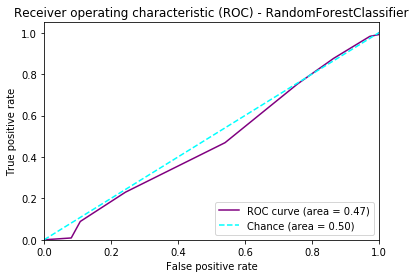

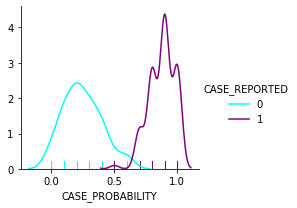

In [9]:
%run -i ./scripts/training.py\
--prefix ./example_outputs/test_discrete_geno\
--rank-features run

<a id="3"></a>
## Part 3: Tuning the Model

In [10]:
%run -i ./scripts/tuning.py\
--prefix ./example_outputs/test_discrete_geno\
--max-tune 10\
--n-cv 3

# FIXME: Module not callable error?

Here is some basic info on the command you are about to run.
Python version info...
3.7.3 (default, Mar 27 2019, 16:54:48) 
[Clang 4.0.1 (tags/RELEASE_401/final)]
CLI argument info...
Working with the dataset and best model corresponding to prefix ./example_outputs/test_discrete_geno the timestamp from the merge is the prefix in most cases.
Your maximum number of tuning iterations is 10 and if you are concerned about runtime, make this number smaller.
You are running 3 rounds of cross-valdiation, and again... if you are concerned about runtime, make this number smaller.
Give credit where credit is due, for this stage of analysis we use code from the great contributors to python packages: argparse, xgboost, sklearn, pandas, numpy, time, matplotlib and seaborn.
As a note, in all exported probabilities and other graphics, case status is treated as a 0 or 1, with 1 representing a positive case.


Your data looks like this (showing the first few lines of the left-most and right-most columns

<a id="4"></a>
## Part 4: Kipoi 

In [31]:
## TODO

<a id="5"></a>
## Part 5: Interpreting the Results

In [7]:
## TODO